In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../data/retail_demand_data.csv", parse_dates=["date"])

df = df.sort_values(["sku_id", "date"])

df.head()


,date,sku_id,category,price,promotion,holiday,demand
0,2024-01-01,SKU_1,Sports,63.88,0,1,91
1,2024-01-02,SKU_1,Sports,87.96,0,0,43
2,2024-01-03,SKU_1,Sports,73.73,0,0,47
3,2024-01-04,SKU_1,Sports,26.51,0,0,66
4,2024-01-05,SKU_1,Sports,57.23,0,0,45


In [2]:
print("Shape:", df.shape)
print(df.isnull().sum())
print(df.describe())



Shape: (36550, 7)
date         0
sku_id       0
category     0
price        0
promotion    0
holiday      0
demand       0
dtype: int64
                                date         price     promotion  \
count                          36550  36550.000000  36550.000000   
mean   2024-12-31 00:00:00.000000256     55.145688      0.100219   
min              2024-01-01 00:00:00     10.000000      0.000000   
25%              2024-07-01 00:00:00     32.720000      0.000000   
50%              2024-12-31 00:00:00     55.195000      0.000000   
75%              2025-07-02 00:00:00     77.460000      0.000000   
max              2025-12-31 00:00:00    100.000000      1.000000   
std                              NaN     25.885832      0.300296   

            holiday        demand  
count  36550.000000  36550.000000  
mean       0.005472     56.576744  
min        0.000000      0.000000  
25%        0.000000     36.000000  
50%        0.000000     55.000000  
75%        0.000000     76.000000  

In [3]:
df["day_of_week"] = df["date"].dt.dayofweek
df["month"] = df["date"].dt.month
df["quarter"] = df["date"].dt.quarter
df["day_of_year"] = df["date"].dt.dayofyear
df["week_of_year"] = df["date"].dt.isocalendar().week.astype(int)

df.head()


,date,sku_id,category,price,promotion,holiday,demand,day_of_week,month,quarter,day_of_year,week_of_year
0,2024-01-01,SKU_1,Sports,63.88,0,1,91,0,1,1,1,1
1,2024-01-02,SKU_1,Sports,87.96,0,0,43,1,1,1,2,1
2,2024-01-03,SKU_1,Sports,73.73,0,0,47,2,1,1,3,1
3,2024-01-04,SKU_1,Sports,26.51,0,0,66,3,1,1,4,1
4,2024-01-05,SKU_1,Sports,57.23,0,0,45,4,1,1,5,1


In [4]:
lags = [1, 7, 14, 30]

for lag in lags:
    df[f"lag_{lag}"] = df.groupby("sku_id")["demand"].shift(lag)


In [5]:
df["rolling_mean_7"] = df.groupby("sku_id")["demand"].transform(
    lambda x: x.shift(1).rolling(7).mean()
)

df["rolling_mean_30"] = df.groupby("sku_id")["demand"].transform(
    lambda x: x.shift(1).rolling(30).mean()
)


In [6]:
df_model = df.dropna()

print("After feature engineering shape:", df_model.shape)


After feature engineering shape: (35050, 18)


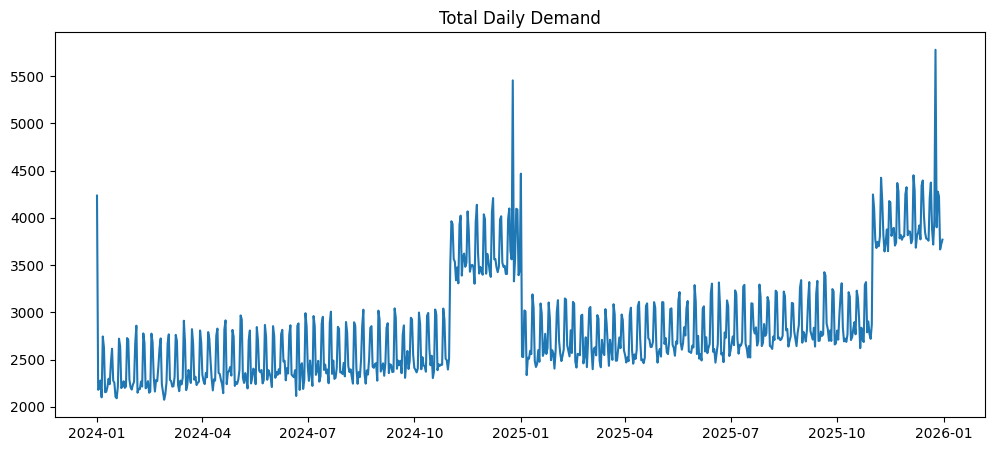

In [7]:
daily_total = df.groupby("date")["demand"].sum()

plt.figure(figsize=(12,5))
plt.plot(daily_total)
plt.title("Total Daily Demand")
plt.show()


In [8]:
df.groupby("promotion")["demand"].mean()


promotion
0    54.104509
1    78.772864
Name: demand, dtype: float64

In [9]:
df[["price", "demand"]].corr()


,price,demand
price,1.000000,-0.290237
demand,-0.290237,1.000000


In [10]:
df_model.to_csv("../data/retail_features.csv", index=False)


In [13]:
df_model.shape



(35050, 18)

In [14]:
df.groupby("promotion")["demand"].mean()


promotion
0    54.104509
1    78.772864
Name: demand, dtype: float64

In [17]:
df[["price", "demand"]].corr()


,price,demand
price,1.000000,-0.290237
demand,-0.290237,1.000000


In [18]:
promo_avg = df.groupby("promotion")["demand"].mean()

plt.figure()
promo_avg.plot(kind="bar")
plt.title("Average Demand: Promotion vs No Promotion")
plt.xlabel("Promotion (0=No, 1=Yes)")
plt.ylabel("Average Demand")
plt.tight_layout()
plt.savefig("../reports/figures/promotion_impact.png")
plt.close()


In [19]:
plt.figure(figsize=(6,5))
plt.scatter(df["price"], df["demand"], alpha=0.3)
plt.title("Price vs Demand")
plt.xlabel("Price")
plt.ylabel("Demand")
plt.tight_layout()
plt.savefig("../reports/figures/price_vs_demand.png")
plt.close()


In [20]:
daily_total = df.groupby("date")["demand"].sum()

plt.figure(figsize=(12,5))
plt.plot(daily_total)
plt.title("Total Daily Demand")
plt.xlabel("Date")
plt.ylabel("Total Demand")
plt.tight_layout()
plt.savefig("../reports/figures/total_demand_trend.png")
plt.close()
